# Data Exploration

## Palm Images

In [1]:
import glob
import cv2
import numpy as np


In [10]:
root_path = "/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/"
ori_image_path = glob.glob(root_path + "images/*.jpg")
ori_label_path = glob.glob(root_path + "labels/*.txt")
ori_image_path.sort()
ori_label_path.sort()
len(ori_image_path), len(ori_label_path), ori_image_path[:10], ori_label_path[:10]


(1902,
 1902,
 ['/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.1fe2924fcf24d535cb971d481b9ee0fd.jpg',
  '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.26d16bd670f73958362481ae343003e9.jpg',
  '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.46634de2fda4bbc79e8295d87ff30b26.jpg',
  '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_1_JPG.rf.27619265e6d05ccc50a70ede632ba7f5.jpg',
  '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_1_JPG.rf.46db32f0eef03053c27a511a96347f2f.jpg',
  '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_1_JPG.rf.4949cebd66ac3ee9c763b6b8b4521f42.jpg',
  '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_3_JPG.rf.30de197023b4e3bf10a3ef06d4f0d7fa.jpg',
  '/Users/sad

In [11]:
# Function to read YOLO bounding boxes from a .txt file
def read_yolo_boxes(file_path):
    boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            class_id, center_x, center_y, width, height = map(float, line.strip().split())
            boxes.append([class_id, center_x, center_y, width, height])
    return boxes

In [28]:
# find the maximum number of labels in a single image

def count_boxes(boxes):
    return len(boxes)


max_labels = 0

for i in ori_label_path:
    yolo_boxes = read_yolo_boxes(i)
    if count_boxes(yolo_boxes) > max_labels:
        max_labels = count_boxes(yolo_boxes)
        
max_labels

156

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from typing import Literal


def plot_image(status: Literal['original', 'resized']):
    # Create figure with subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"{status} Images with YOLO Bounding Boxes")

    for i in range(3):
        print(ori_image_path[i])
        image = cv2.imread(ori_image_path[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if status == 'resized':
            image = cv2.resize(image, (256, 256))
        
        height, width, _ = image.shape
        axes[i].imshow(image)
        axes[i].axis('off')
        
        # Read YOLO bounding boxes from .txt file
        yolo_boxes = read_yolo_boxes(ori_label_path[i])
        axes[i].set_title(f'Image {i+1} _ {len(yolo_boxes)} boxes')
        
        # Convert normalized coordinates to pixel coordinates and add rectangles
        for box_idx, box in enumerate(yolo_boxes, 1):
            class_id, x_center, y_center, w, h = box
            
            # Convert normalized coordinates to pixel coordinates
            x_center = int(x_center * width)
            y_center = int(y_center * height)
            w = int(w * width)
            h = int(h * height)
            
            # Calculate top-left corner from center coordinates
            x1 = int(x_center - w/2)
            y1 = int(y_center - h/2)
            
            # Draw rectangle
            rect = patches.Rectangle(
                (x1, y1), w, h,
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            axes[i].add_patch(rect)
            
            # Add count label
            # axes[i].text(x1, y1-5, f'#{box_idx}', 
            #             color='red', 
            #             fontsize=12, 
            #             bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.show()

/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.1fe2924fcf24d535cb971d481b9ee0fd.jpg
/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.26d16bd670f73958362481ae343003e9.jpg
/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.46634de2fda4bbc79e8295d87ff30b26.jpg


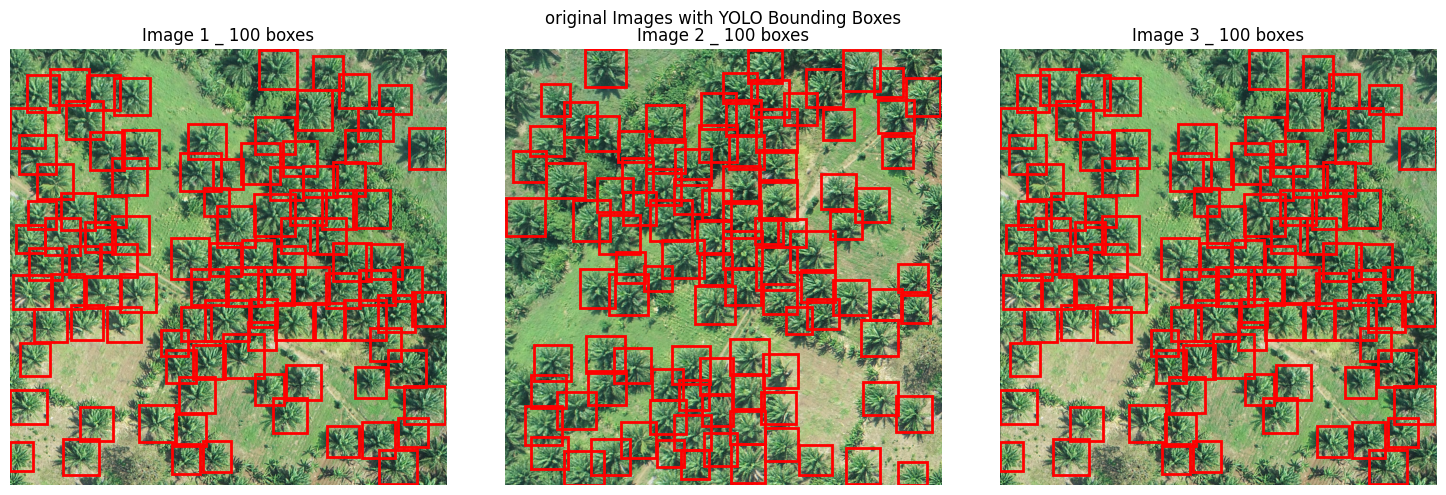

In [20]:
plot_image(status='original')

/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.1fe2924fcf24d535cb971d481b9ee0fd.jpg
/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.26d16bd670f73958362481ae343003e9.jpg
/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/images/DJI_0006_0_JPG.rf.46634de2fda4bbc79e8295d87ff30b26.jpg


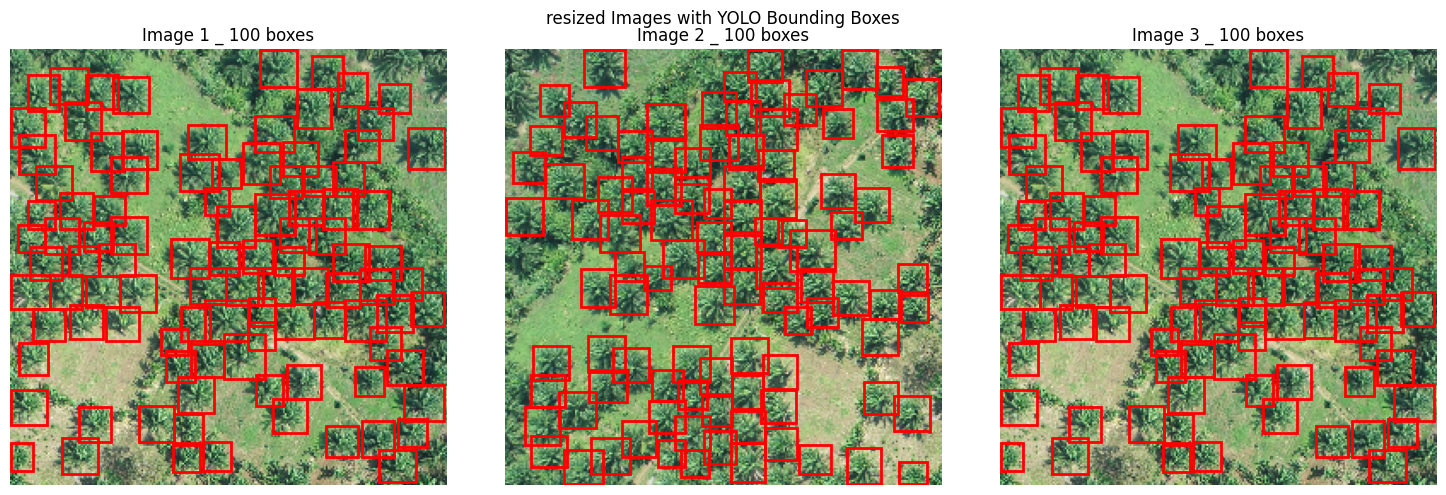

In [21]:
plot_image(status='resized')

## Apple Datasets

In [1]:
import glob
import cv2
import numpy as np

In [10]:
base_path = "/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/detection"
# glob.glob("/train/***")

In [12]:
len(glob.glob(f"{base_path}/train/images/*.png")), len(glob.glob(f"{base_path}/train/masks/*.png"))

(670, 670)